In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import mplleaflet
from networkx.algorithms import bipartite

In [2]:
def gener_graph(csvdf):
    G = nx.DiGraph()
    G = nx.from_pandas_dataframe(csvdf, 'user_id', 'business_id')
    csvdf.columns=['user_stars','user_id','business_id','user_name','business_name','business_stars','review_count','latitude','longitude']
    nodes = csvdf[['business_id',"business_name","review_count",'latitude','longitude']].drop_duplicates(subset=None, keep='first', inplace=False)
    nx.set_node_attributes(G, 'review_count', pd.Series(nodes.review_count.values, index=nodes.business_id).to_dict())
    nx.set_node_attributes(G, 'latitude', pd.Series(nodes.latitude.values, index=nodes.business_id).to_dict())
    nx.set_node_attributes(G, 'longitude', pd.Series(nodes.longitude.values, index=nodes.business_id).to_dict())
    nx.set_node_attributes(G, 'buesiness_name', pd.Series(nodes.business_name.values, index=nodes.business_id).to_dict())
    return G
def bipartite_business(csvdf):
    G = gener_graph(csvdf)
    business=set(csvdf['business_id'])
    G_b= bipartite.weighted_projected_graph(G, business)
    return G_b
def draw_bipartite(csvdf):
    G_b = bipartite_business(csvdf)
    node_positions = {node[0]: (node[1]['longitude'], node[1]['latitude']) for node in G_b.nodes(data=True)}
    fig, ax = plt.subplots()

    edge_width = [1.5*G_b[u][v]['weight'] for u,v in G_b.edges()]
    node_size = [20*nx.get_node_attributes(G_b, 'review_count')[v] for v in G_b]
    node_color = [G_b.degree(v) for v in G_b]
    nx.draw_networkx(G_b,pos=node_positions,node_size=node_size,node_color=node_color, alpha=0.8,  with_labels=False,width=edge_width,edge_color='.4', cmap=plt.cm.Reds)

    mplleaflet.display(fig=ax.figure)
    plt.show()

# markham total review:25600

In [3]:
markham=pd.read_csv('dataset/Markhamnostar.csv')
markham.head()

stars                 user_id             business_id      name  \
0      3  CxDOIDnH8gp9KXzpBHJYXw  8gzRJEmYJGTCdahRKcafXw  Jennifer   
1      2  EiP1OFgs-XGcKZux0OKWIA  8gzRJEmYJGTCdahRKcafXw   Allison   
2      3  XJI4QgNCdJewOIQn8211LQ  8gzRJEmYJGTCdahRKcafXw       Tom   
3      1  2zad2cqXRAvgf0PD1BRKdA  kSp9lWgQJrE9nsX7OS-x8w     Annie   
4      4  xgVSyCvQ2XBsfFBqkWmdFA  kSp9lWgQJrE9nsX7OS-x8w       Ian   

                  name.1  stars.1  review_count  latitude  longitude  
0          Tea & Kitchen      2.5             3   43.8227   -79.3133  
1          Tea & Kitchen      2.5             3   43.8227   -79.3133  
2          Tea & Kitchen      2.5             3   43.8227   -79.3133  
3  Essence of Unionville      3.0            18   43.8538   -79.3337  
4  Essence of Unionville      3.0            18   43.8538   -79.3337

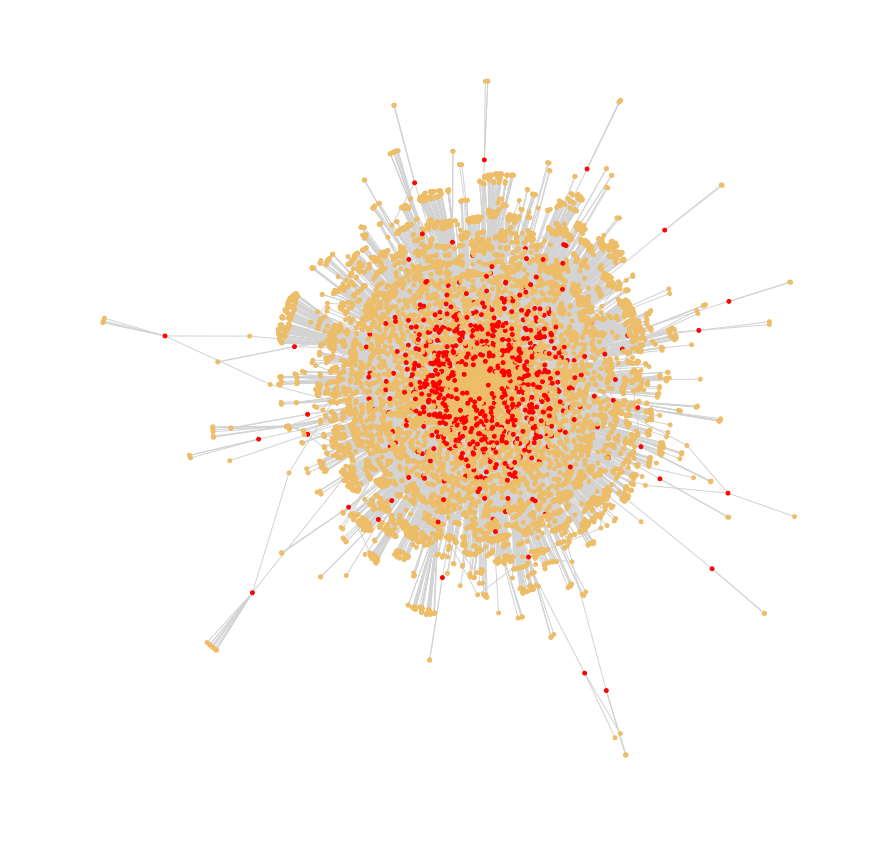

In [87]:
G=gener_graph(markham)
pos = nx.spring_layout(G)
business_markham_all=set(markham['business_id'])
#user_laval=set(laval_all['user_id'])
color_map = []
label_map = []

for node in G:
    if node in business_markham_all:
        color_map.append('#D32323')
        label_map.append("business(restrauant)")
    else: 
        color_map.append('#EDBD68') 
        label_map.append("user")

nx.draw_networkx(G,pos,node_size=15,node_color = color_map,edge_color='#D3D3D3',with_labels=False)

from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 15,15

plt.axis('off')
plt.savefig('review.jpg')
plt.show()

In [4]:
G_b=bipartite_business(markham)

# clustering coefficient

In [271]:
nx.average_clustering(G_b)

0.8552062017884623

# connected component

In [272]:
nx.isolates(G_b)

[]

# diameter

In [273]:
nx.diameter(G_b)

3

# business:708

In [275]:
nodes = markham[['business_id','business_stars',"review_count",'latitude','longitude']].drop_duplicates(subset=None, keep='first', inplace=False)
nodes.shape

(708, 5)

# review count distribution

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


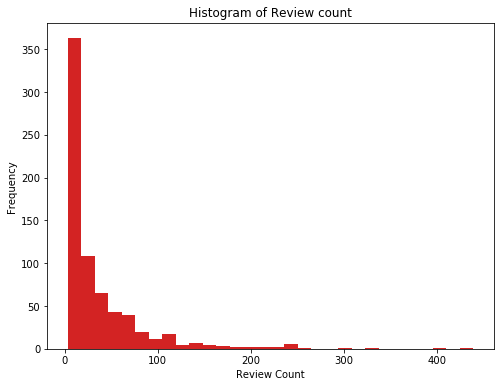

In [277]:
plt.figure(figsize=(8,6))
plt.subplot(1,1,1,axisbg=(1,1,1))
plt.hist(nodes['review_count'],color='#D32323',bins=30)
plt.title("Histogram of Review count")
plt.xlabel("Review Count")
plt.ylabel("Frequency")
plt.savefig('reviewcount.jpg')
plt.show()

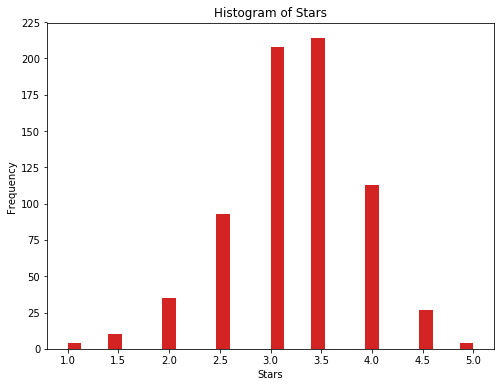

In [280]:
plt.figure(figsize=(8,6))
#plt.subplot(1,1,1,axisbg=(1,1,1))
plt.hist(nodes['business_stars'],color='#D32323',bins=30)
plt.title("Histogram of Stars")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.savefig('star.jpg')
plt.show()

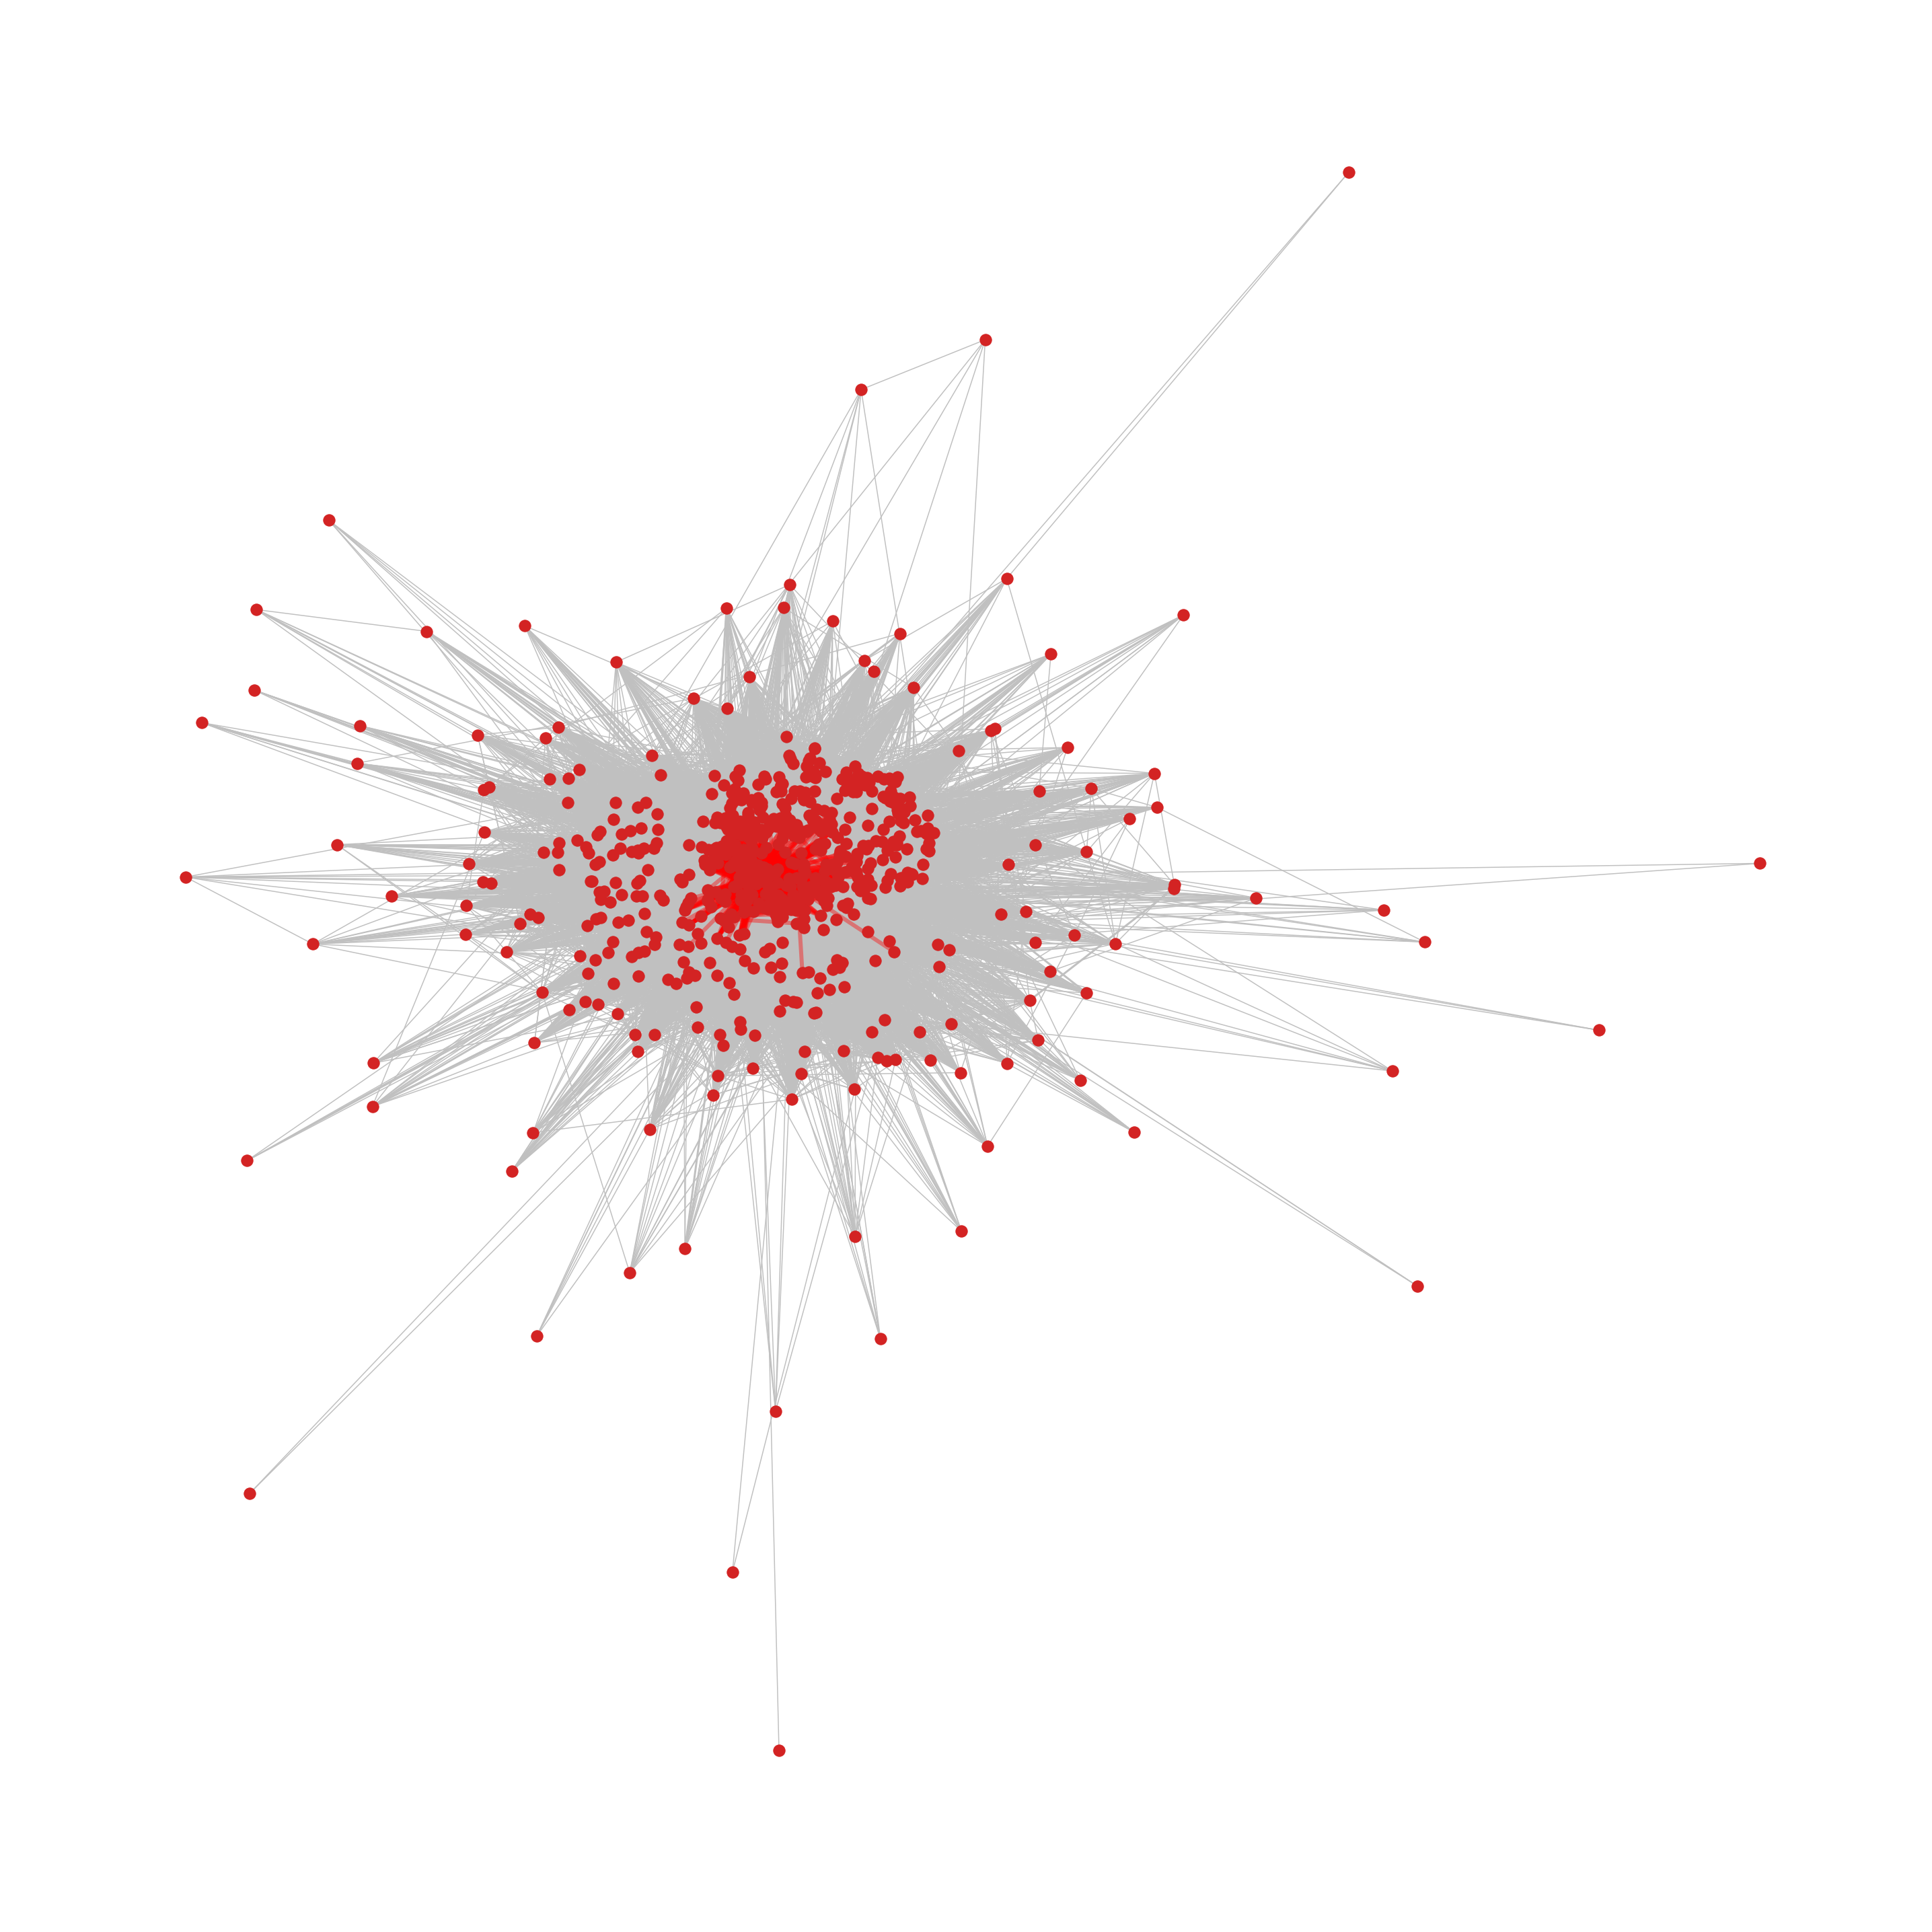

In [6]:
pos = nx.spring_layout(G_b)
edge_width = [1.5*G_b[u][v]['weight'] for u,v in G_b.edges()]
nx.draw_networkx(G_b,pos,with_labels=False,width=edge_width,node_color='#D32323',edge_color='#C0C0C0')
greater_than_5 = [x for x in G_b.edges(data=True) if x[2]['weight']>10]
nx.draw_networkx_edges(G_b,pos, edgelist=greater_than_5, edge_color='r', alpha=0.4, width=6)
from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 40,40
#plt.figure(figsize=(40,40))
plt.axis('off')
plt.tight_layout();

plt.show()

# star>4

In [429]:
markham_4=pd.read_csv('dataset/Markham.csv')
markham_4.head()

stars                 user_id             business_id     name      name.1  \
0      5  JEpXqyz6aNiyCHNrlopoeA  Cx0wkl85Xdw9OCQkbXMjzQ    Steph  Sushi Bong   
1      5  aOseJnydZYD8Og00vWylqg  Cx0wkl85Xdw9OCQkbXMjzQ    Jacky  Sushi Bong   
2      5  aU4ba7OlYKOKJ9kpvbOcsg  Cx0wkl85Xdw9OCQkbXMjzQ  Kenneth  Sushi Bong   
3      4  orh0HRUNCWuQMt9Iia_osg  Cx0wkl85Xdw9OCQkbXMjzQ   Joanne  Sushi Bong   
4      4  6wO1gHEzc0rYmXhuiXMFaA  Cx0wkl85Xdw9OCQkbXMjzQ  Breanna  Sushi Bong   

   stars.1  review_count  latitude  longitude  
0      4.0            93   43.8035   -79.4206  
1      4.0            93   43.8035   -79.4206  
2      4.0            93   43.8035   -79.4206  
3      4.0            93   43.8035   -79.4206  
4      4.0            93   43.8035   -79.4206

In [430]:
G_b4=bipartite_business(markham_4)

In [431]:
nx.average_clustering(G_b4)

0.6767444340504007

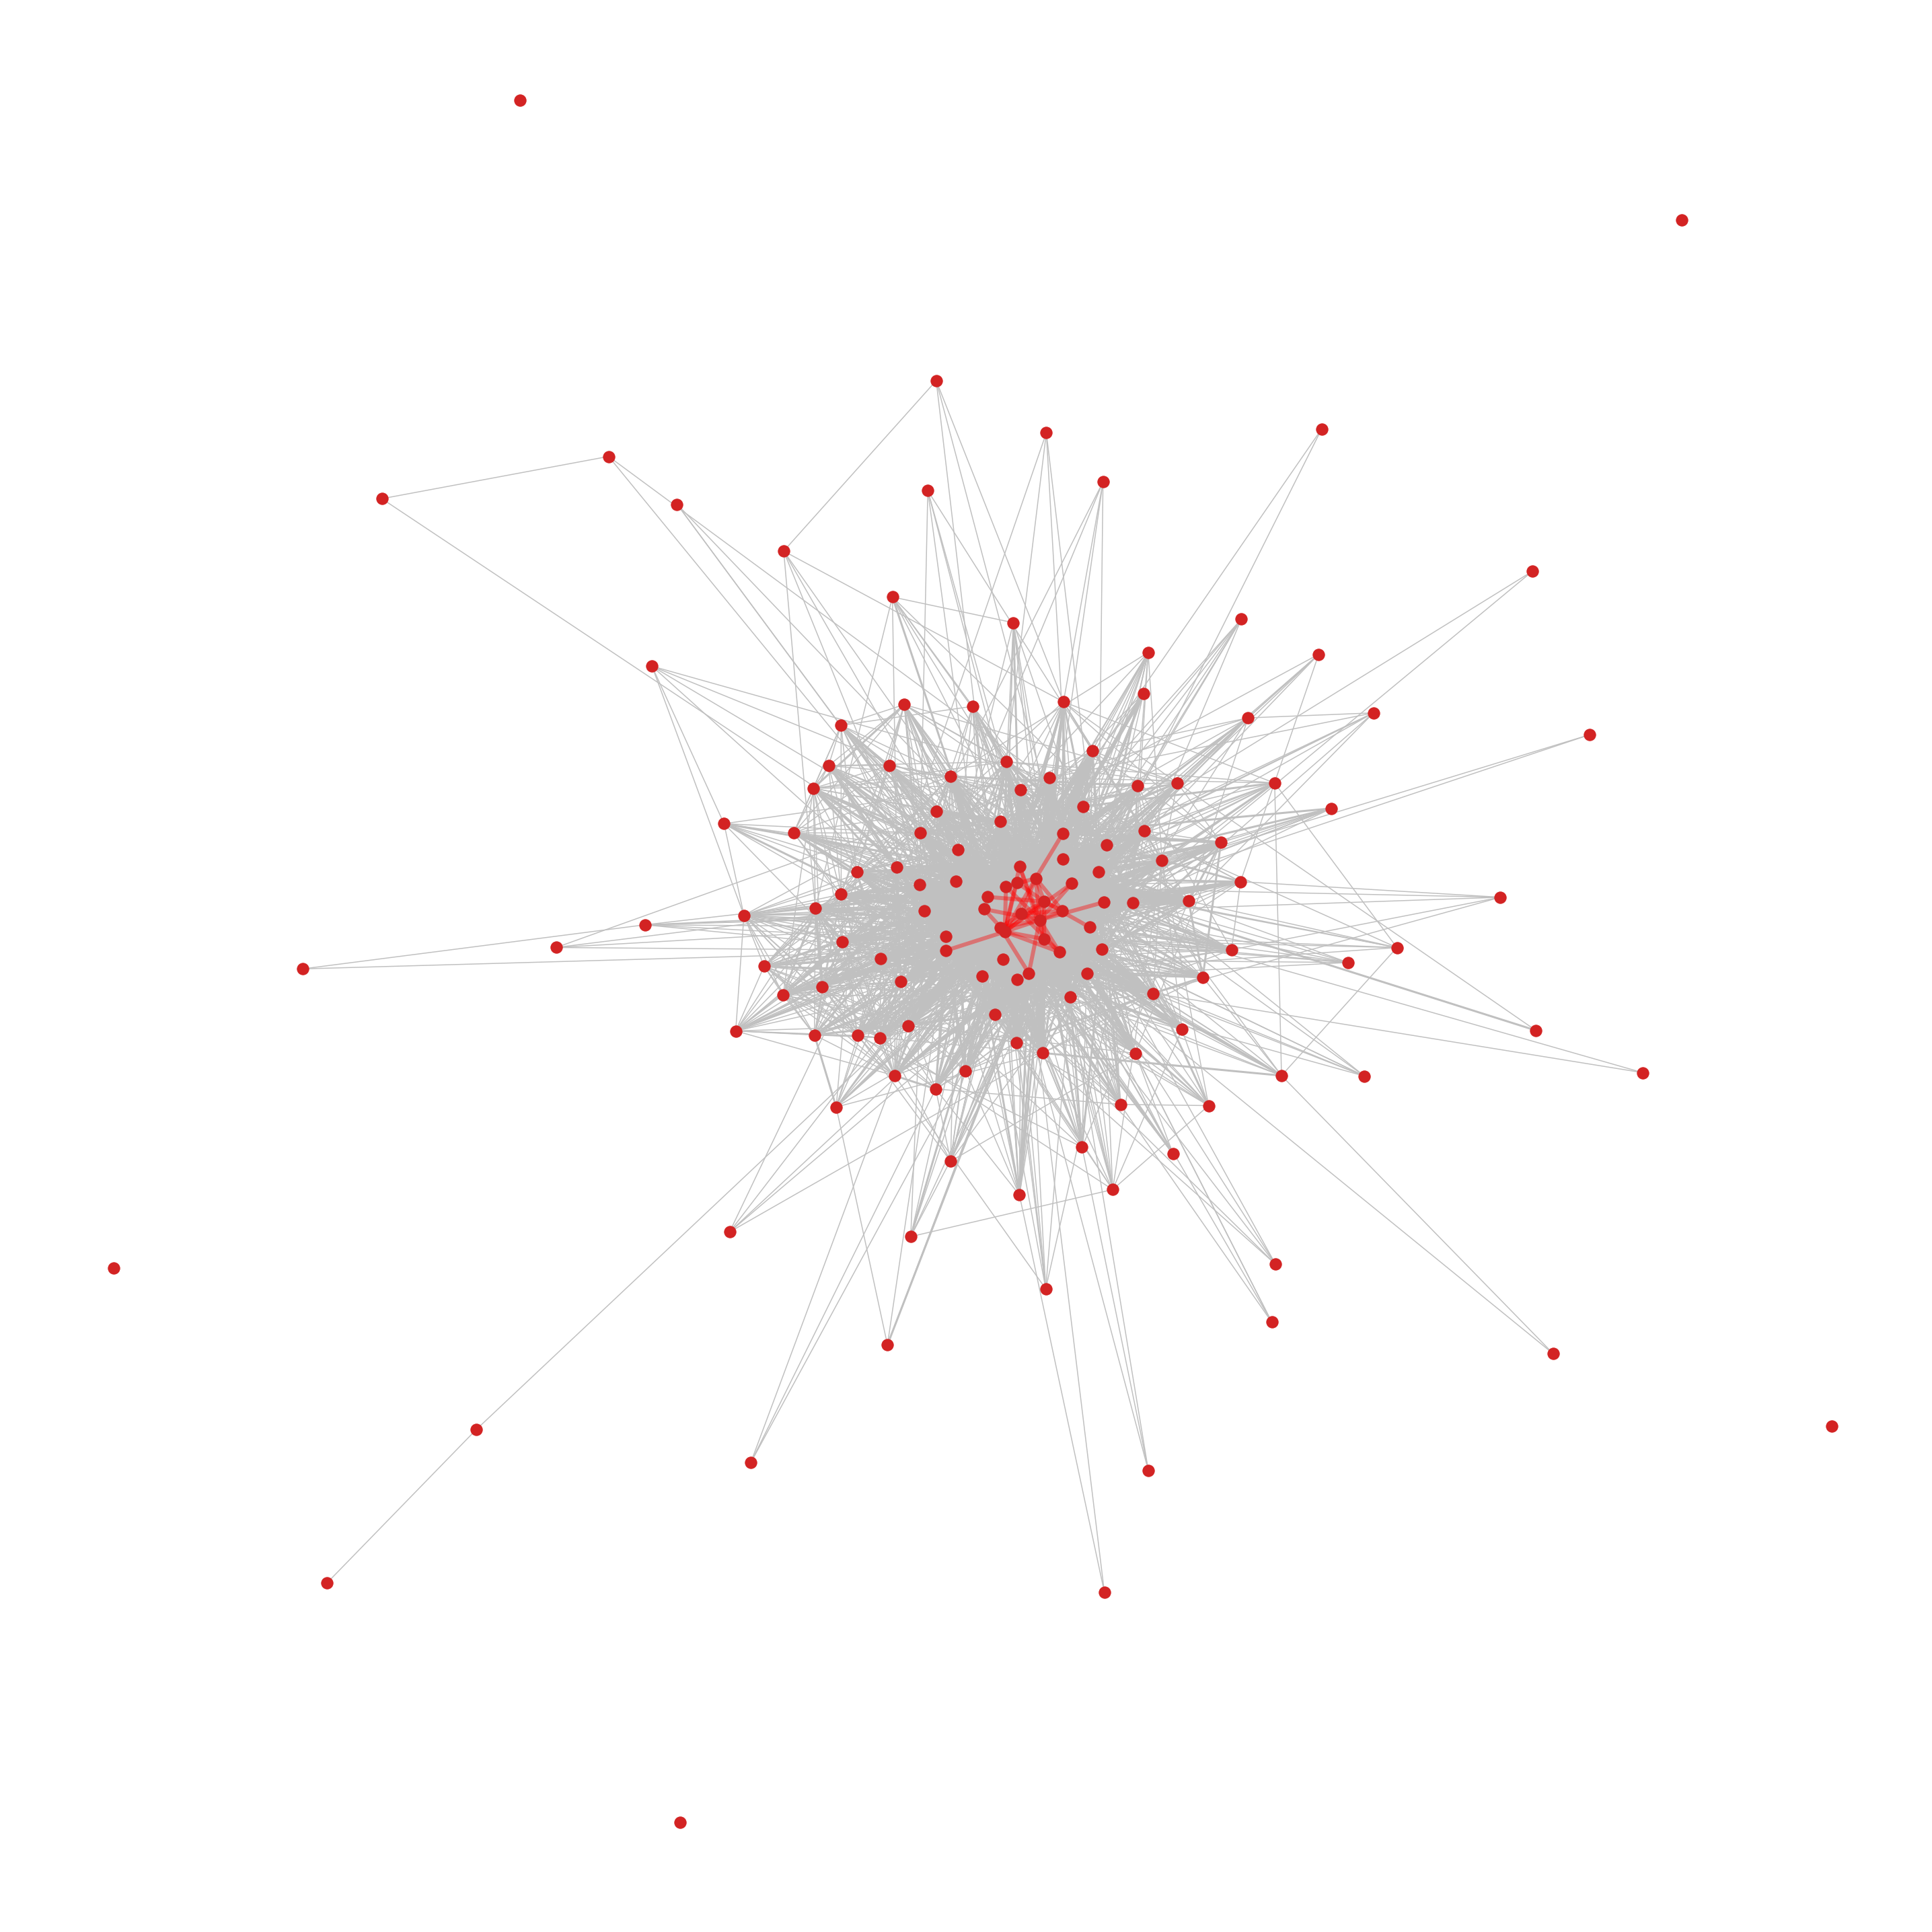

In [432]:
pos = nx.spring_layout(G_b4)
edge_width = [1.5*G_b4[u][v]['weight'] for u,v in G_b4.edges()]
nx.draw_networkx(G_b4,pos,with_labels=False,width=edge_width,node_color='#D32323',edge_color='#C0C0C0')
greater_than_5 = [x for x in G_b4.edges(data=True) if x[2]['weight']>10]
nx.draw_networkx_edges(G_b4,pos, edgelist=greater_than_5, edge_color='r', alpha=0.4, width=6)
from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 40,40
#plt.figure(figsize=(40,40))
plt.axis('off')
plt.tight_layout();
plt.savefig('circular.jpg')
plt.show()


In [457]:
nodes4 = markham_4[['business_id',"business_stars",'business_name',"review_count",'latitude','longitude']].drop_duplicates(subset=None, keep='first', inplace=False)
nodes4.head()

business_id  business_stars  \
0    Cx0wkl85Xdw9OCQkbXMjzQ             4.0   
70   5XVabANkehj7oH-Z7YZkwg             4.0   
249  3AWtQN1iX9n9DjRfvxMEWw             4.0   
257  0KQE_-HWEAL_eBKIsEFf3Q             4.0   
263  XCxxPZ3Lu5mwmIo7IQRf1g             4.0   

                              business_name  review_count  latitude  longitude  
0                                Sushi Bong            93   43.8035   -79.4206  
70                           Alchemy Coffee           231   43.8606   -79.3120  
249                          Duck & Chicken            11   43.8059   -79.4220  
257                            Sakura Seoul             8   43.8034   -79.4194  
263  Osaka Sushi Japanese Korean Restaurant           236   43.8723   -79.2668

In [434]:
nx.isolates(G_b4)

['xLhO9n3lE23RCSoo_7d21w',
 '_GxIYv74MyV0pEZ28ZHSlQ',
 'f5xm2RiwLv0gbmXU4BkrGA',
 'lX553YVMOt46NAaQyhNf7w',
 'TqZk5nsqYBOa62XYQ7bXvQ']

In [435]:
remove = [node for node,degree in G_b4.degree().items() if degree < 1]
remove

['xLhO9n3lE23RCSoo_7d21w',
 '_GxIYv74MyV0pEZ28ZHSlQ',
 'f5xm2RiwLv0gbmXU4BkrGA',
 'lX553YVMOt46NAaQyhNf7w',
 'TqZk5nsqYBOa62XYQ7bXvQ']

In [436]:
G_b4.remove_nodes_from(remove)
G_b5=G_b4
G_b5.number_of_nodes()


139

In [437]:
nx.diameter(G_b5)

4

In [438]:
nx.average_clustering(G_b5)

0.7010877590162424

In [423]:
deg=nx.degree(G_b5) 
deg
degsort=sorted(deg.items(),key=operator.itemgetter(1),reverse=True)
degsort

[('5XVabANkehj7oH-Z7YZkwg', 90),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 89),
 ('xaqW4NkmUCGRRjmLxiFJ6Q', 87),
 ('htQgj-ANQpZGpIpkkrEmyQ', 87),
 ('bNqBMZ00lnhhfxzV8OhLfQ', 85),
 ('K1nwSvx14on6eVBbu5E9rA', 85),
 ('1_rqZz1K5Uoq2RvZlINfgA', 80),
 ('XCxxPZ3Lu5mwmIo7IQRf1g', 79),
 ('pOvTYClFgMm-wAXPW1CnhQ', 76),
 ('Cs8BaiKkyNU6mzxq9nTsmg', 75),
 ('hPTx2Y5e4Czbr21XcbDN8g', 73),
 ('LKDGDUiDKTuo93gwF5guPA', 72),
 ('kNZJMnTNXj42EfUGX3eRcw', 72),
 ('ax4ztJvW28xgGvI0OPqGcQ', 70),
 ('8lPxiYChdJdTV24NJvOB3Q', 69),
 ('sePTDv1dGHPID7kwuNzXaA', 68),
 ('8xPmlVJy2o6x0J04CBpEMQ', 68),
 ('l9vx-OTdDPU-oHZ17aVxdg', 67),
 ('9fKYo_6qLPofBbts0JAnSw', 65),
 ('zBd5JvFWuMGlnCYLaGsXZg', 63),
 ('cqUky5KFtMlqKaAUYiOnLA', 60),
 ('zLPs4wSjtfZxVy3WByt00g', 59),
 ('hDO8bWV_Ua8NxtfpStuuZg', 58),
 ('-Lgj3gdQZiVngAEc1yALzw', 56),
 ('b1fiN3A2fmsuQzNvIRtiPQ', 54),
 ('Hk1Q874UqawFXq0XzIIBYg', 54),
 ('Cx0wkl85Xdw9OCQkbXMjzQ', 54),
 ('-7EwIdxcRC5McO35DVfeSQ', 53),
 ('TITY-kzuk2hLumFrPnVlgA', 52),
 ('CC8AIB3g1d88YVpmaUsVgA', 51),
 ('Ac0kKKf

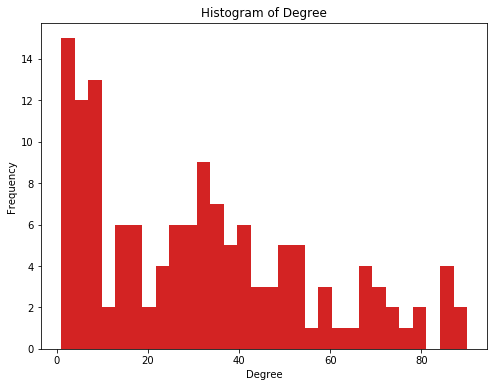

In [424]:

df_deg = pd.DataFrame(degsort, columns=['id', 'degree'])
#df_deg.head()
plt.figure(figsize=(8,6))

plt.hist(df_deg['degree'],color='#D32323',bins=30)
plt.title("Histogram of Degree")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.savefig('degree.jpg')

plt.show()

In [374]:
df4 = pd.DataFrame(G_b5.edges(data=True), columns=['business1', 'business2', 'weight'])
df4['weight'] = df4['weight'].map(lambda x: x['weight'])
df4.head()

business1               business2  weight
0  -Lgj3gdQZiVngAEc1yALzw  -7EwIdxcRC5McO35DVfeSQ       1
1  -Lgj3gdQZiVngAEc1yALzw  9fKYo_6qLPofBbts0JAnSw       2
2  -Lgj3gdQZiVngAEc1yALzw  zBd5JvFWuMGlnCYLaGsXZg       1
3  -Lgj3gdQZiVngAEc1yALzw  1_rqZz1K5Uoq2RvZlINfgA       2
4  -Lgj3gdQZiVngAEc1yALzw  Ac0kKKfYGM-vKORWCg20eg       1

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


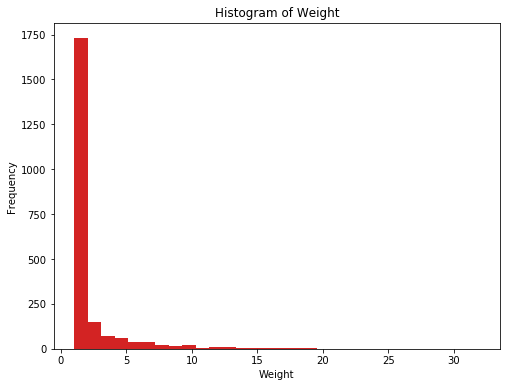

In [375]:
plt.figure(figsize=(8,6))
plt.subplot(1,1,1,axisbg=(1,1,1))
plt.hist(df4['weight'],color='#D32323',bins=30)
plt.title("Histogram of Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.savefig('weight.jpg')
plt.show()

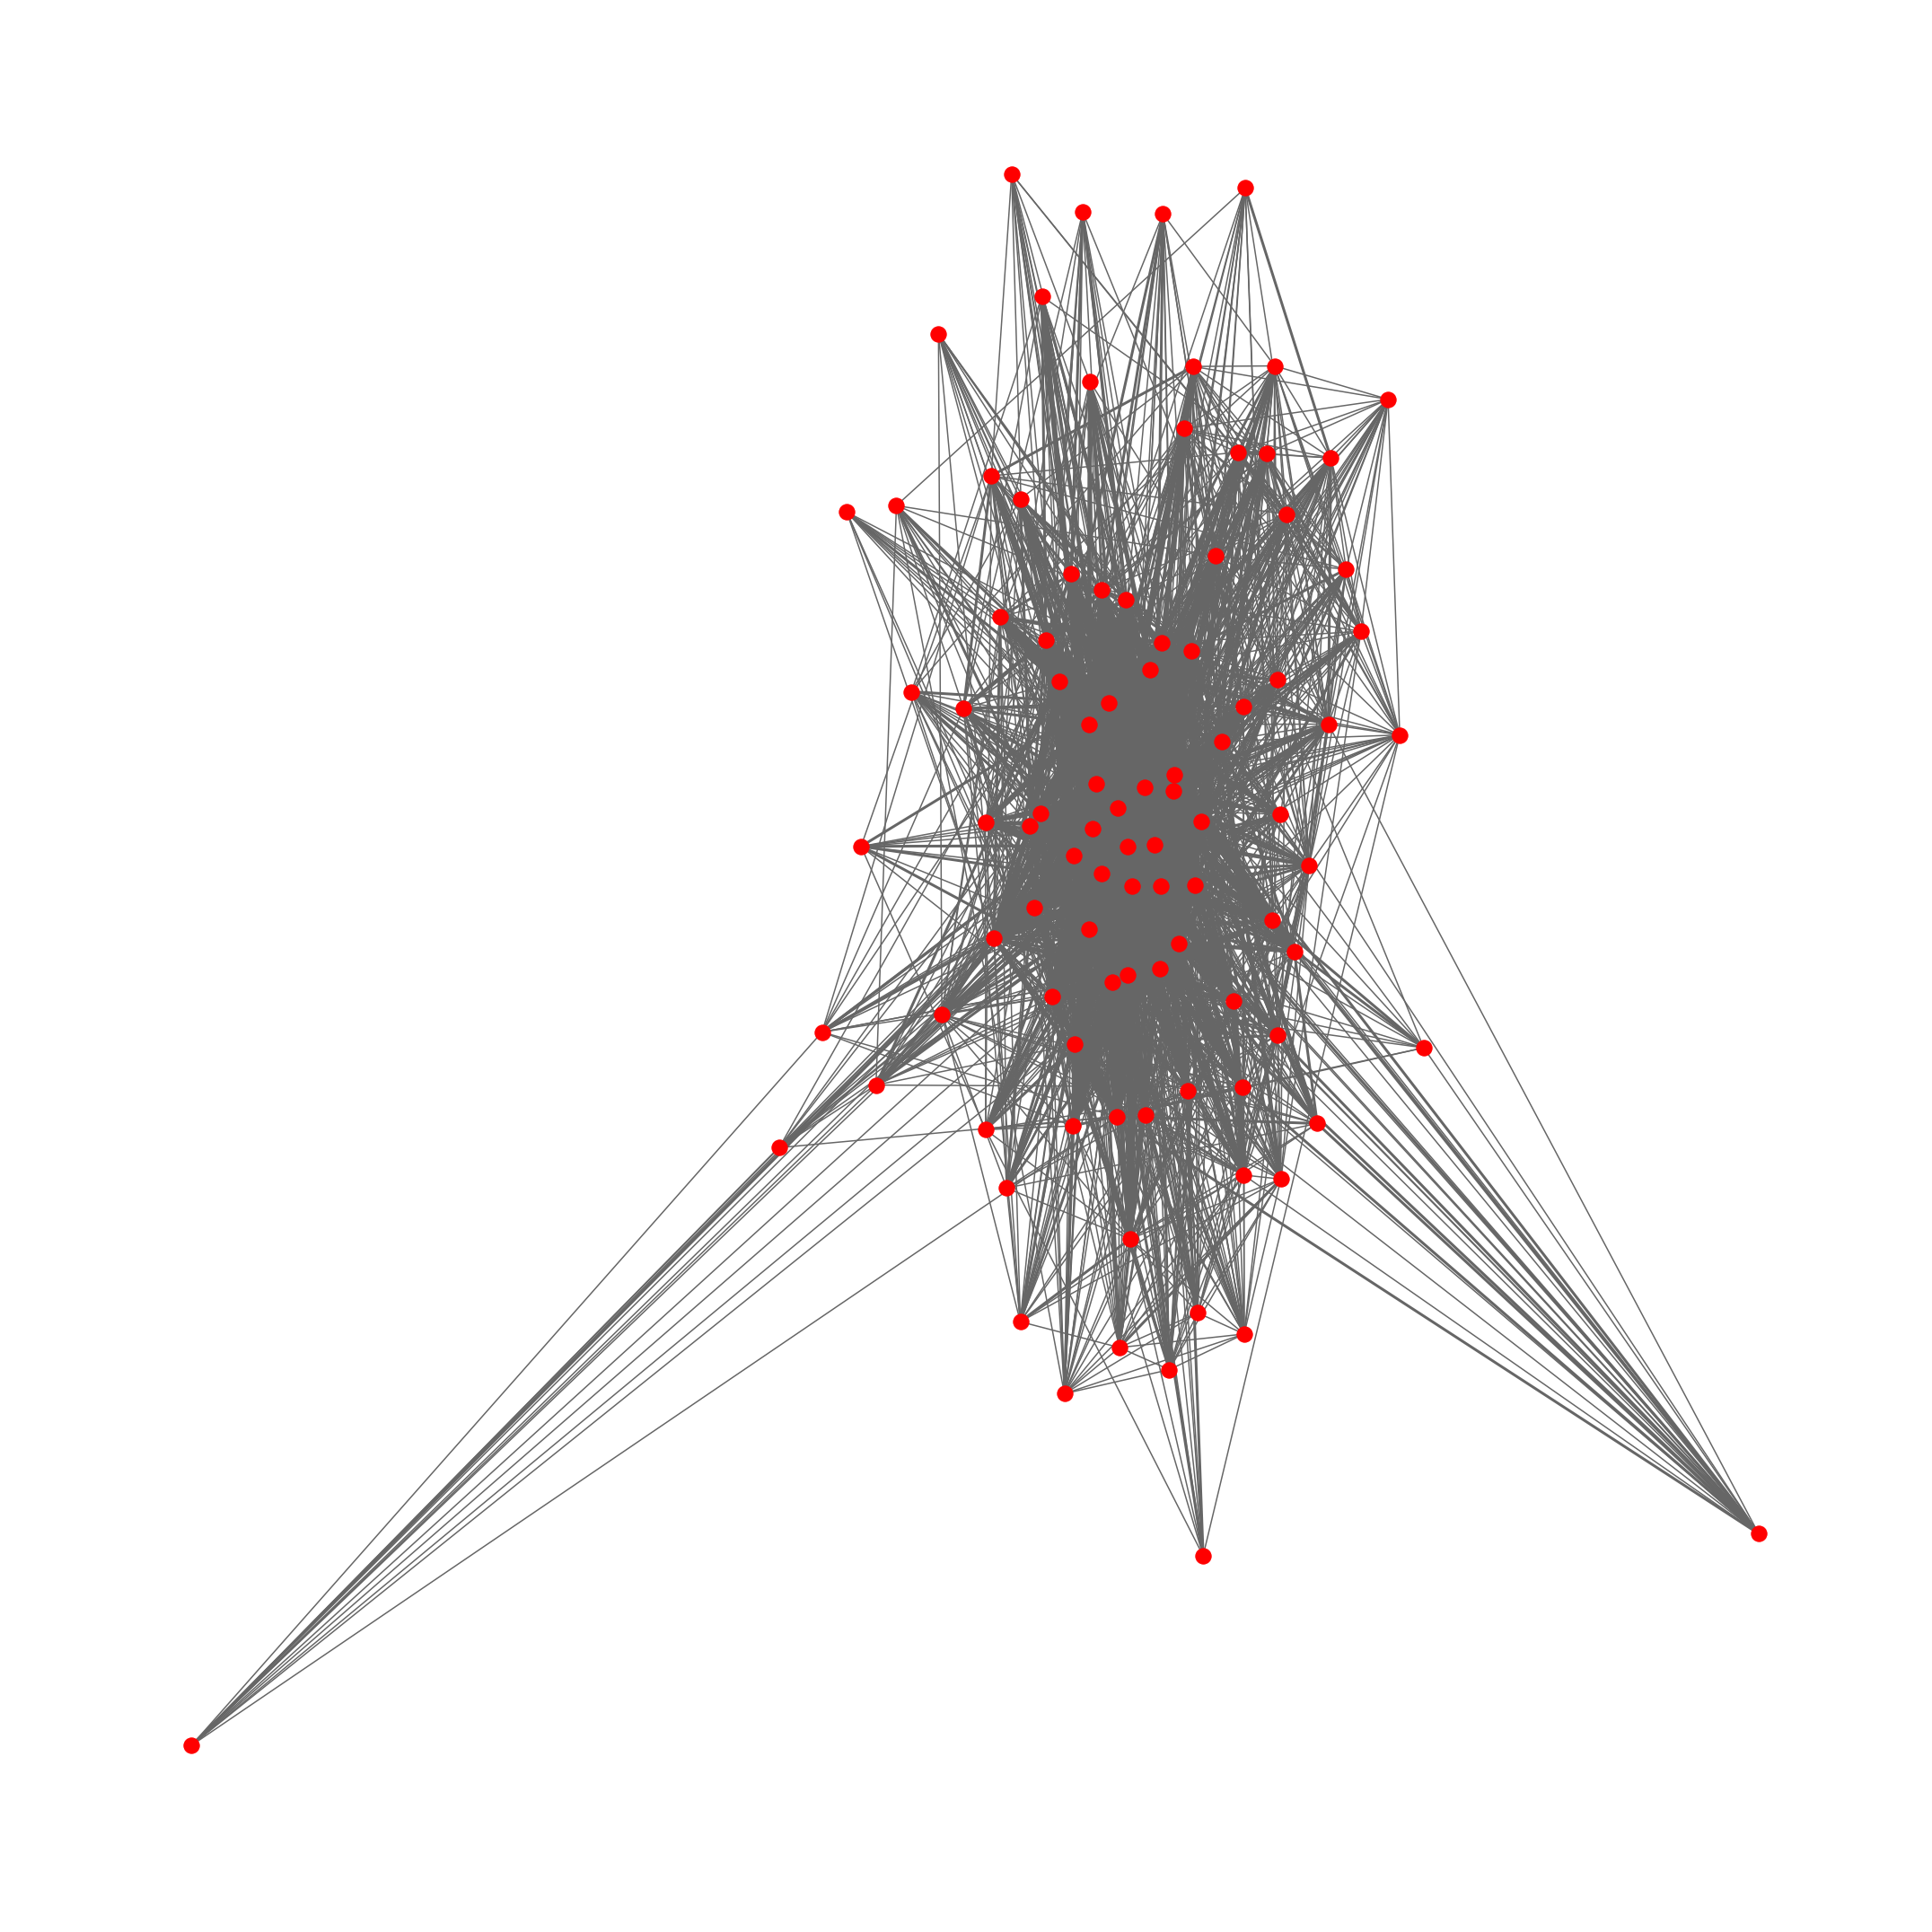

In [468]:
pos = nx.spring_layout(G_b4)
edge_width = [1.5*G_b4[u][v]['weight'] for u,v in G_b4.edges()]
nx.draw_networkx(G_b4,pos,with_labels=False,width=edge_width,edge_color='.4')
greater_than_5 = [x for x in G_b4.edges(data=True) if x[2]['weight']>5]
#nx.draw_networkx_edges(G_b4,pos, edgelist=greater_than_5, edge_color='r', alpha=0.4, width=6)
from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 30,30
#plt.figure(figsize=(40,40))
plt.axis('off')
plt.tight_layout();
plt.show()

In [439]:
remove2 = [node for node,degree in G_b5.degree().items() if degree < 11]
remove2

['GDiSja9Y9yJSeROIeApyEg',
 'N8Ct3JmR0AF_41G9OOF1QQ',
 'IUHv7Jm3GdCSYyz1A_7VVA',
 'pQUjQZgOzUX-KUXYHZKpng',
 'ybKhwymik8zofQTJnhGifw',
 'YNjW13ls0enqM2Lep2cCsQ',
 'DZtCOjxk8o3spThN215Gbg',
 'sZ1v8adjdMVq7En88x6wtQ',
 'VJaHTx4eZtWNpDrAbGzR4A',
 'q1IxHtEyuYLk7hNnMPOm6g',
 'TetRSApdg8YUcQ-WvDyU8g',
 'kE7BXayByJplaUZ_0r7QSA',
 'VsAx_YduvuobBKl2Ep8mhw',
 'J6xRU44NIJzkPq9CPGTLeA',
 'BWnVdK1W8i9kYU75u0DMHA',
 'gIVjdDWRnS1yDVpPF3oUeg',
 'BCa9j5GEo5lnEPywu-TiFA',
 '0XlbdDkYzC14SZF_bUGeXA',
 'EqJRslgHFfw3DcKMdFtaNg',
 'TQSHiH6KSCd2TDYEDTYRMA',
 'ea3kF5zspg4eNmxSbZixsA',
 'aE_InMCFg_6htbySiMd75Q',
 'Z4GRRhxLpHqXiiHeV99ARQ',
 'G2ZP40c11X5ZZh1xHaJVMA',
 'd6XTJ4SO1FkORkPc9IJJZQ',
 'y76Gvmb75VdhOoxWIvUSzg',
 'WFLl7zdzeLj6S37Hc_6lKg',
 'kJL5YIQJJCp03RtLQvbf0A',
 'f1ekudjT4wtVZBcI_GIcFA',
 'a60ZJVSe893i_Gl-ym_SIA',
 '_VPprqqmGb276dJfwPDLaw',
 'bpXjVgy_XkTnySLMlvSg5w',
 '0KQE_-HWEAL_eBKIsEFf3Q',
 'anhLhbtprJ2QkjRxmLRqsw',
 '6ThiBVRWO3alyc7WJ9TMmw',
 'mVtV6vSMMMxLk_zIWYWG0A',
 'H97gae0HLwN876RhZ2q3Ng',
 

In [440]:
G_b5.remove_nodes_from(remove2)
G_b6=G_b5
G_b6.number_of_nodes()

98

In [449]:
import community
partition = community.best_partition(G_b6)
partition
#values
#df_part = pd.DataFrame([partition], columns=partition.keys())
#df_part

{'-7EwIdxcRC5McO35DVfeSQ': 1,
 '-Lgj3gdQZiVngAEc1yALzw': 0,
 '0tAbgK3TT6bNHtT4KOHZCQ': 1,
 '1_rqZz1K5Uoq2RvZlINfgA': 3,
 '2iSXzsmucGHn_NM51y29bQ': 0,
 '3AWtQN1iX9n9DjRfvxMEWw': 1,
 '5XVabANkehj7oH-Z7YZkwg': 0,
 '6Bmq3b91hqTwMFn5cpPWzQ': 1,
 '7wi0yczEe3OC3P8CpkZz2g': 0,
 '872bhARqHoDEljyEboTDew': 2,
 '8lPxiYChdJdTV24NJvOB3Q': 1,
 '8xPmlVJy2o6x0J04CBpEMQ': 0,
 '9AVuEdSl85ZEd49zrdsK5g': 1,
 '9fKYo_6qLPofBbts0JAnSw': 1,
 '9q_O836mXia6Lqkirl2Ynw': 3,
 'Ac0kKKfYGM-vKORWCg20eg': 3,
 'AuKKWh7jc1G7G_P_l8fd-g': 0,
 'B4SQCxWWvOLlyqHBFrNlSw': 1,
 'CC8AIB3g1d88YVpmaUsVgA': 0,
 'Cs8BaiKkyNU6mzxq9nTsmg': 3,
 'Cx0wkl85Xdw9OCQkbXMjzQ': 0,
 'FfA7BYSEc46Y3lKHOiqn4g': 2,
 'GkY6UWWn0Fz2ehcuBp66pg': 1,
 'Hk1Q874UqawFXq0XzIIBYg': 3,
 'I8cCdp3q_5oCEykzZgPkQw': 0,
 'II44-On32pZWqzfpke7zhg': 1,
 'J6x28YX3K7ErHU0uPMSfyA': 2,
 'JpyHiBZtQel1b0OuvRz_pw': 0,
 'K1nwSvx14on6eVBbu5E9rA': 0,
 'KsaVx2E63ZMXUQfrxcp_XQ': 1,
 'LCvbdVqfIZkxHwWwN4uisg': 0,
 'LKDGDUiDKTuo93gwF5guPA': 1,
 'LdOSw3VbUZOmqup0jeU_Dw': 3,
 'MCXLDCA9

In [450]:
mod = community.modularity(partition, G_b6)
mod

0.12315418072194172

In [458]:
nx.set_node_attributes(G_b6, 'modularity', partition)
class0 = [n for n in G_b6.nodes() if G_b6.node[n]['modularity'] == 0]
class0
nodes4.loc[nodes4['business_id'].isin(class0)].to_excel('class.xlsx')

In [459]:
class1 = [n for n in G_b6.nodes() if G_b6.node[n]['modularity'] == 1]

nodes4.loc[nodes4['business_id'].isin(class1)].to_excel('class1.xlsx')

In [460]:
class2 = [n for n in G_b6.nodes() if G_b6.node[n]['modularity'] == 2]

nodes4.loc[nodes4['business_id'].isin(class2)].to_excel('class2.xlsx')
class3 = [n for n in G_b6.nodes() if G_b6.node[n]['modularity'] == 3]

nodes4.loc[nodes4['business_id'].isin(class3)].to_excel('class3.xlsx')

In [461]:
node_positions = {node[0]: (node[1]['longitude'], node[1]['latitude']) for node in G_b6.nodes(data=True)}
fig, ax = plt.subplots()

#edge_width = [1.5*G_b6[u][v]['weight'] for u,v in G_b6.edges()]
#node_size = [10*nx.get_node_attributes(G_b6, 'review_count')[v] for v in G_b6]
node_color = [partition.get(node) for node in G_b6.nodes()]
nx.draw_networkx(G_b6,pos=node_positions,node_color=node_color, edge_color='.4',alpha=0.6, with_labels=False, cmap=plt.get_cmap('jet'))
#greater_than_5 = [x for x in G_b4.edges(data=True) if x[2]['weight']>10]
#nx.draw_networkx_edges(G_b4,pos=node_positions, edgelist=greater_than_5, edge_color='r', alpha=0.4,width=edge_width)
#nx.draw_networkx_labels(G_b4,pos=node_positions, labels=node_labels,font_size=16,font_color='b')

mplleaflet.display(fig=ax.figure)

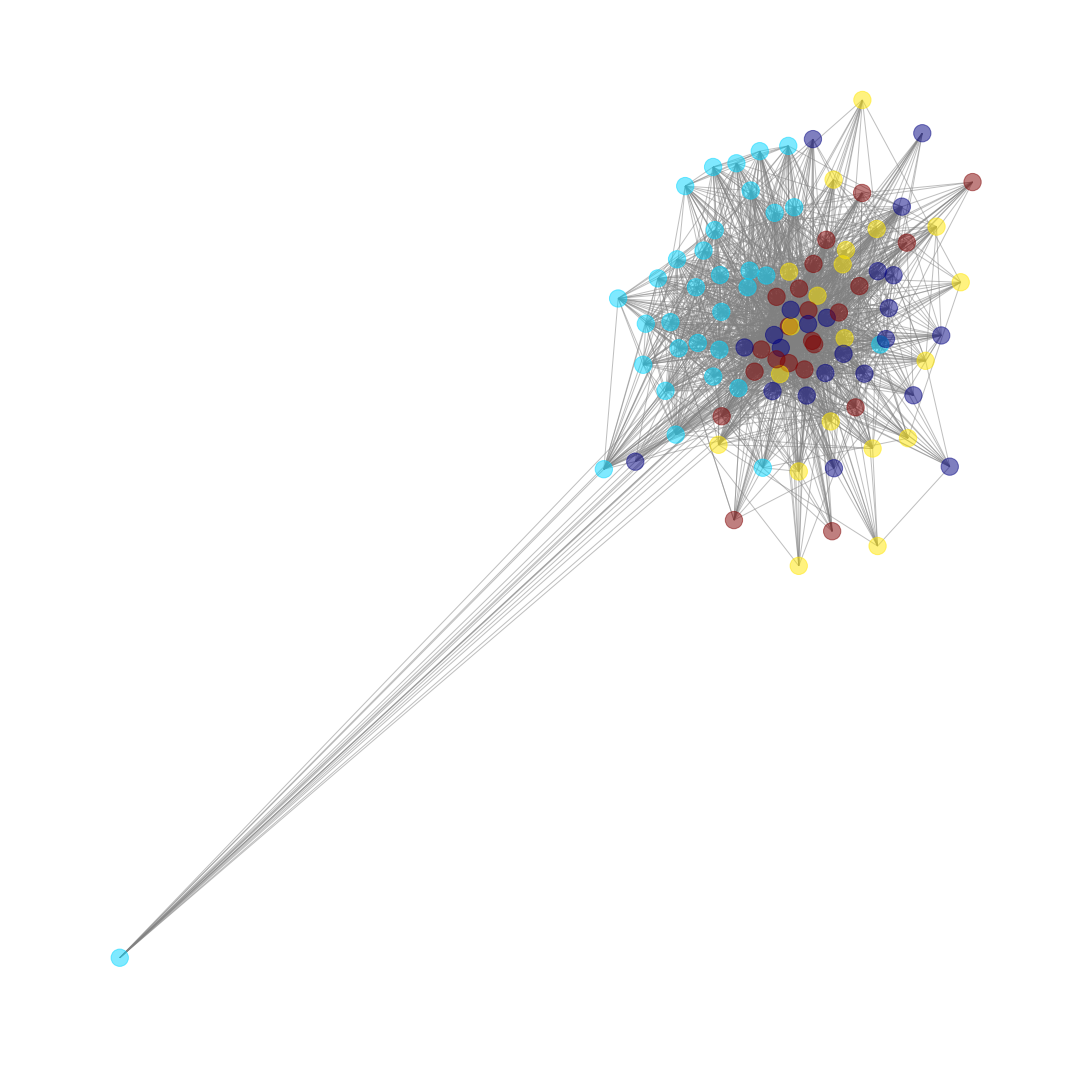

In [465]:
values = [partition.get(node) for node in G_b4.nodes()]
pos = nx.spring_layout(G_b4)
nx.draw_networkx(G_b4,pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=300, edge_color="gray",alpha=0.5,with_labels=False)
rcParams['figure.figsize'] = 15,15
plt.savefig('community.jpg')
plt.axis('off')
plt.tight_layout()
plt.show()

In [351]:
df4 = pd.DataFrame(G_b6.edges(data=True), columns=['business1', 'business2', 'weight'])
df4['weight'] = df4['weight'].map(lambda x: x['weight'])
df4.head()

business1               business2  weight
0  -Lgj3gdQZiVngAEc1yALzw  -7EwIdxcRC5McO35DVfeSQ       1
1  -Lgj3gdQZiVngAEc1yALzw  9fKYo_6qLPofBbts0JAnSw       2
2  -Lgj3gdQZiVngAEc1yALzw  zBd5JvFWuMGlnCYLaGsXZg       1
3  -Lgj3gdQZiVngAEc1yALzw  1_rqZz1K5Uoq2RvZlINfgA       2
4  -Lgj3gdQZiVngAEc1yALzw  Ac0kKKfYGM-vKORWCg20eg       1

In [352]:
remove3 = [x for x in G_b6.edges(data=True) if x[2]['weight']<11]
remove3

[('-Lgj3gdQZiVngAEc1yALzw', '-7EwIdxcRC5McO35DVfeSQ', {'weight': 1}),
 ('-Lgj3gdQZiVngAEc1yALzw', '9fKYo_6qLPofBbts0JAnSw', {'weight': 2}),
 ('-Lgj3gdQZiVngAEc1yALzw', 'zBd5JvFWuMGlnCYLaGsXZg', {'weight': 1}),
 ('-Lgj3gdQZiVngAEc1yALzw', '1_rqZz1K5Uoq2RvZlINfgA', {'weight': 2}),
 ('-Lgj3gdQZiVngAEc1yALzw', 'Ac0kKKfYGM-vKORWCg20eg', {'weight': 1}),
 ('-Lgj3gdQZiVngAEc1yALzw', 'bNqBMZ00lnhhfxzV8OhLfQ', {'weight': 6}),
 ('-Lgj3gdQZiVngAEc1yALzw', 'htQgj-ANQpZGpIpkkrEmyQ', {'weight': 6}),
 ('-Lgj3gdQZiVngAEc1yALzw', '8xPmlVJy2o6x0J04CBpEMQ', {'weight': 9}),
 ('-Lgj3gdQZiVngAEc1yALzw', 'dPVCSAu8xVIDXD-C3s6c5Q', {'weight': 1}),
 ('-Lgj3gdQZiVngAEc1yALzw', 'kNZJMnTNXj42EfUGX3eRcw', {'weight': 2}),
 ('-Lgj3gdQZiVngAEc1yALzw', 'o_TPuqXuH-O_FbEkFNACUA', {'weight': 2}),
 ('-Lgj3gdQZiVngAEc1yALzw', 'cKG42eNhcACwgXcqAyhjRg', {'weight': 1}),
 ('-Lgj3gdQZiVngAEc1yALzw', 'erRdoBvb4ywWky3KMjtVdg', {'weight': 2}),
 ('-Lgj3gdQZiVngAEc1yALzw', 'B4SQCxWWvOLlyqHBFrNlSw', {'weight': 1}),
 ('-Lgj3gdQZiVngAEc1

In [353]:
G_b6.remove_edges_from(remove3)
G_b7=G_b6
G_b7.edges(data=True)

[('f3gE6ZZFd7jRBjTVgt-mAg', 'sePTDv1dGHPID7kwuNzXaA', {'weight': 12}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 'XCxxPZ3Lu5mwmIo7IQRf1g', {'weight': 16}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 'xaqW4NkmUCGRRjmLxiFJ6Q', {'weight': 16}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', '5XVabANkehj7oH-Z7YZkwg', {'weight': 11}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 'ax4ztJvW28xgGvI0OPqGcQ', {'weight': 13}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 'zBd5JvFWuMGlnCYLaGsXZg', {'weight': 14}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', '1_rqZz1K5Uoq2RvZlINfgA', {'weight': 15}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 'bNqBMZ00lnhhfxzV8OhLfQ', {'weight': 18}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 'htQgj-ANQpZGpIpkkrEmyQ', {'weight': 32}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 'pOvTYClFgMm-wAXPW1CnhQ', {'weight': 11}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 'Cs8BaiKkyNU6mzxq9nTsmg', {'weight': 13}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 'hPTx2Y5e4Czbr21XcbDN8g', {'weight': 17}),
 ('f3gE6ZZFd7jRBjTVgt-mAg', 'K1nwSvx14on6eVBbu5E9rA', {'weight': 18}),
 ('sePTDv1dGHPID7kwuNzXaA', 'htQgj-ANQpZGpIpkkrEmyQ', {'weight': 13}),
 ('YNp

In [354]:
remove4 = [node for node,degree in G_b7.degree().items() if degree < 1]
remove4

['-Lgj3gdQZiVngAEc1yALzw',
 'o1bF2ZBMw8Vep67NlECmxA',
 '-7EwIdxcRC5McO35DVfeSQ',
 'i5VbbQTbymMPMtktQklYsA',
 'l9vx-OTdDPU-oHZ17aVxdg',
 'AuKKWh7jc1G7G_P_l8fd-g',
 'dPVCSAu8xVIDXD-C3s6c5Q',
 'erRdoBvb4ywWky3KMjtVdg',
 '7wi0yczEe3OC3P8CpkZz2g',
 'vUqIE5La92aMJrY8kGgwsw',
 'b1fiN3A2fmsuQzNvIRtiPQ',
 'Hk1Q874UqawFXq0XzIIBYg',
 'KsaVx2E63ZMXUQfrxcp_XQ',
 'MZ4EEf4VtkeSJURIGgp2AQ',
 'Y7p6zjpZL6wKRWLZTzxu3A',
 'CC8AIB3g1d88YVpmaUsVgA',
 'tJ3Y8chfwruslf5TTNuTNw',
 'fpuyZ31OpX11UlJGFWKoNw',
 'vfxgy-NJlpd6mrMTZTMSBg',
 'jz6TVOeItn3XXqUjAGzl6g',
 '6Bmq3b91hqTwMFn5cpPWzQ',
 'lsqO3nJh11JPIcjwvu4YoQ',
 'aWndhjjBzYgk5OOYflbK4A',
 '872bhARqHoDEljyEboTDew',
 'RYGWTRVTC4_ZrfsJwpE5VQ',
 'orjS8GtlcTRTod-y6cHwgA',
 'FfA7BYSEc46Y3lKHOiqn4g',
 '9AVuEdSl85ZEd49zrdsK5g',
 '8lPxiYChdJdTV24NJvOB3Q',
 'QJg8AuqITB4t_iKrLI6tOw',
 'miUmZ27vC-gHoyEmUQMYuQ',
 'Q_BMz5zeWFWW-2OuJGZ1yg',
 'rXVLgV4Og3l98OTy6N2dJw',
 'LKDGDUiDKTuo93gwF5guPA',
 'XNVUXM8xY-slNbcPAr-w8Q',
 'zLPs4wSjtfZxVy3WByt00g',
 'wP8yCVWN2sC5_fYMMVvpDg',
 

In [355]:
G_b7.remove_nodes_from(remove4)
G_b8=G_b7
G_b8.nodes(data=True)

[('f3gE6ZZFd7jRBjTVgt-mAg',
  {'buesiness_name': "Pa Pa Chang's",
   'latitude': 43.891500000000001,
   'longitude': -79.265600000000006,
   'review_count': 246}),
 ('sePTDv1dGHPID7kwuNzXaA',
  {'buesiness_name': "Sam's Congee Delight",
   'latitude': 43.828499999999998,
   'longitude': -79.305999999999997,
   'review_count': 118}),
 ('YNpwfdqBeP6j8aFrJp2sQw',
  {'buesiness_name': 'Sweet Esc',
   'latitude': 43.823999999999998,
   'longitude': -79.326400000000007,
   'review_count': 138}),
 ('XCxxPZ3Lu5mwmIo7IQRf1g',
  {'buesiness_name': 'Osaka Sushi Japanese Korean Restaurant',
   'latitude': 43.872300000000003,
   'longitude': -79.266800000000003,
   'review_count': 236}),
 ('xaqW4NkmUCGRRjmLxiFJ6Q',
  {'buesiness_name': 'Muncheez',
   'latitude': 43.803199999999997,
   'longitude': -79.419499999999999,
   'review_count': 329}),
 ('TITY-kzuk2hLumFrPnVlgA',
  {'buesiness_name': 'Funky Munky Cafe',
   'latitude': 43.893500000000003,
   'longitude': -79.263000000000005,
   'review_count

In [357]:
node_labels = nx.get_node_attributes(G_b8, 'buesiness_name')
node_labels

{'1_rqZz1K5Uoq2RvZlINfgA': 'Cho Sun Ok',
 '5XVabANkehj7oH-Z7YZkwg': 'Alchemy Coffee',
 '8xPmlVJy2o6x0J04CBpEMQ': 'Toast Delight',
 'Cs8BaiKkyNU6mzxq9nTsmg': 'Congee Queen',
 'Cx0wkl85Xdw9OCQkbXMjzQ': 'Sushi Bong',
 'K1nwSvx14on6eVBbu5E9rA': 'Good Catch Boil House',
 'TITY-kzuk2hLumFrPnVlgA': 'Funky Munky Cafe',
 'XCxxPZ3Lu5mwmIo7IQRf1g': 'Osaka Sushi Japanese Korean Restaurant',
 'YNpwfdqBeP6j8aFrJp2sQw': 'Sweet Esc',
 'ax4ztJvW28xgGvI0OPqGcQ': 'New City Restaurant',
 'bNqBMZ00lnhhfxzV8OhLfQ': 'Big Bone BBQ & Wicked Wings',
 'f3gE6ZZFd7jRBjTVgt-mAg': "Pa Pa Chang's",
 'hDO8bWV_Ua8NxtfpStuuZg': 'Initium',
 'hPTx2Y5e4Czbr21XcbDN8g': 'Mei Nung Beef Noodle House',
 'htQgj-ANQpZGpIpkkrEmyQ': 'Inspire Restaurant',
 'kNZJMnTNXj42EfUGX3eRcw': 'Los Chicos Brasa',
 'pOvTYClFgMm-wAXPW1CnhQ': 'Bamiyan Kabob',
 'sePTDv1dGHPID7kwuNzXaA': "Sam's Congee Delight",
 'xaqW4NkmUCGRRjmLxiFJ6Q': 'Muncheez',
 'zBd5JvFWuMGlnCYLaGsXZg': 'Pho Metro'}

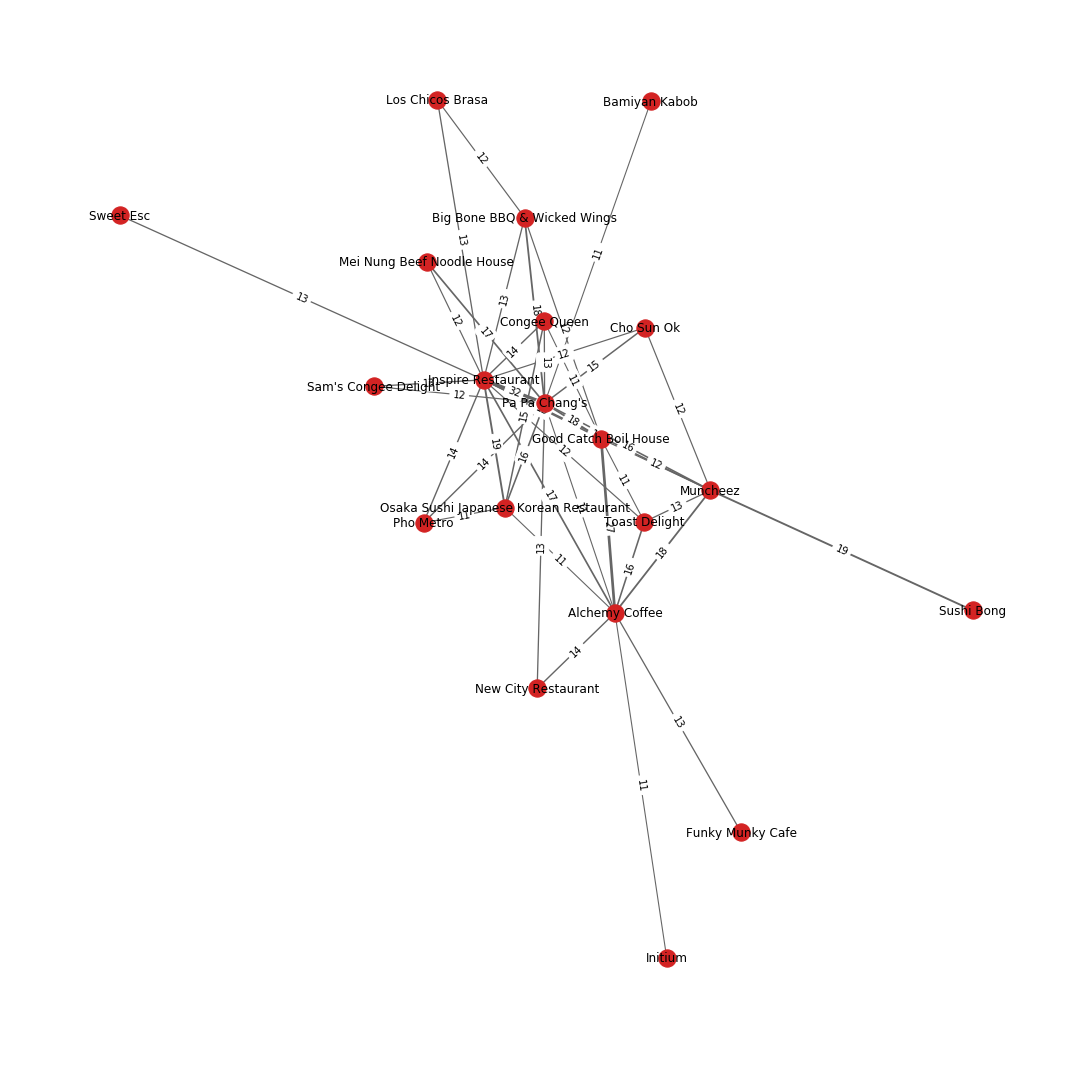

In [358]:
pos = nx.spring_layout(G_b4)
edge_width = [0.1*G_b4[u][v]['weight'] for u,v in G_b4.edges()]
labels = nx.get_edge_attributes(G_b4,'weight')
nx.draw_networkx(G_b4,pos,labels=node_labels,with_labels=True,width=edge_width,edge_color='.4',node_color='#D32323')
nx.draw_networkx_edge_labels(G_b4,pos,edge_labels=labels)
#greater_than_5 = [x for x in G_b4.edges(data=True) if x[2]['weight']>5]
#nx.draw_networkx_edges(G_b4,pos, edgelist=greater_than_5, edge_color='r', alpha=0.4, width=6)
from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 10,10
#plt.figure(figsize=(40,40))
plt.axis('off')
plt.tight_layout();
plt.savefig('topweight.jpg')
plt.show()

In [260]:
from networkx.algorithms.community import k_clique_communities
list(k_clique_communities(G_b4,2))

[frozenset({'1_rqZz1K5Uoq2RvZlINfgA',
            '5XVabANkehj7oH-Z7YZkwg',
            '8xPmlVJy2o6x0J04CBpEMQ',
            'Cs8BaiKkyNU6mzxq9nTsmg',
            'Cx0wkl85Xdw9OCQkbXMjzQ',
            'K1nwSvx14on6eVBbu5E9rA',
            'TITY-kzuk2hLumFrPnVlgA',
            'XCxxPZ3Lu5mwmIo7IQRf1g',
            'YNpwfdqBeP6j8aFrJp2sQw',
            'ax4ztJvW28xgGvI0OPqGcQ',
            'bNqBMZ00lnhhfxzV8OhLfQ',
            'f3gE6ZZFd7jRBjTVgt-mAg',
            'hDO8bWV_Ua8NxtfpStuuZg',
            'hPTx2Y5e4Czbr21XcbDN8g',
            'htQgj-ANQpZGpIpkkrEmyQ',
            'kNZJMnTNXj42EfUGX3eRcw',
            'pOvTYClFgMm-wAXPW1CnhQ',
            'sePTDv1dGHPID7kwuNzXaA',
            'xaqW4NkmUCGRRjmLxiFJ6Q',
            'zBd5JvFWuMGlnCYLaGsXZg'})]

In [259]:
list(nx.find_cliques(G_b4))

[['htQgj-ANQpZGpIpkkrEmyQ',
  '8xPmlVJy2o6x0J04CBpEMQ',
  'xaqW4NkmUCGRRjmLxiFJ6Q',
  '5XVabANkehj7oH-Z7YZkwg',
  'K1nwSvx14on6eVBbu5E9rA'],
 ['htQgj-ANQpZGpIpkkrEmyQ',
  'f3gE6ZZFd7jRBjTVgt-mAg',
  'sePTDv1dGHPID7kwuNzXaA'],
 ['htQgj-ANQpZGpIpkkrEmyQ',
  'f3gE6ZZFd7jRBjTVgt-mAg',
  'XCxxPZ3Lu5mwmIo7IQRf1g',
  'Cs8BaiKkyNU6mzxq9nTsmg'],
 ['htQgj-ANQpZGpIpkkrEmyQ',
  'f3gE6ZZFd7jRBjTVgt-mAg',
  'XCxxPZ3Lu5mwmIo7IQRf1g',
  '5XVabANkehj7oH-Z7YZkwg'],
 ['htQgj-ANQpZGpIpkkrEmyQ',
  'f3gE6ZZFd7jRBjTVgt-mAg',
  'XCxxPZ3Lu5mwmIo7IQRf1g',
  'zBd5JvFWuMGlnCYLaGsXZg'],
 ['htQgj-ANQpZGpIpkkrEmyQ',
  'f3gE6ZZFd7jRBjTVgt-mAg',
  '1_rqZz1K5Uoq2RvZlINfgA',
  'xaqW4NkmUCGRRjmLxiFJ6Q'],
 ['htQgj-ANQpZGpIpkkrEmyQ',
  'f3gE6ZZFd7jRBjTVgt-mAg',
  'hPTx2Y5e4Czbr21XcbDN8g'],
 ['htQgj-ANQpZGpIpkkrEmyQ',
  'f3gE6ZZFd7jRBjTVgt-mAg',
  'K1nwSvx14on6eVBbu5E9rA',
  'bNqBMZ00lnhhfxzV8OhLfQ'],
 ['htQgj-ANQpZGpIpkkrEmyQ',
  'f3gE6ZZFd7jRBjTVgt-mAg',
  'K1nwSvx14on6eVBbu5E9rA',
  '5XVabANkehj7oH-Z7YZkwg',
  'xaqW4NkmU